In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

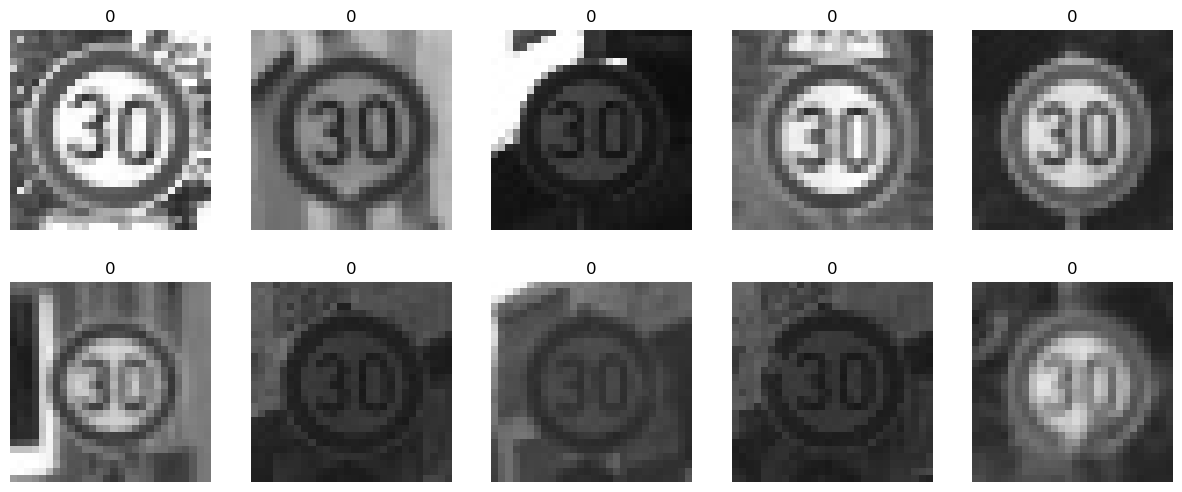

In [3]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

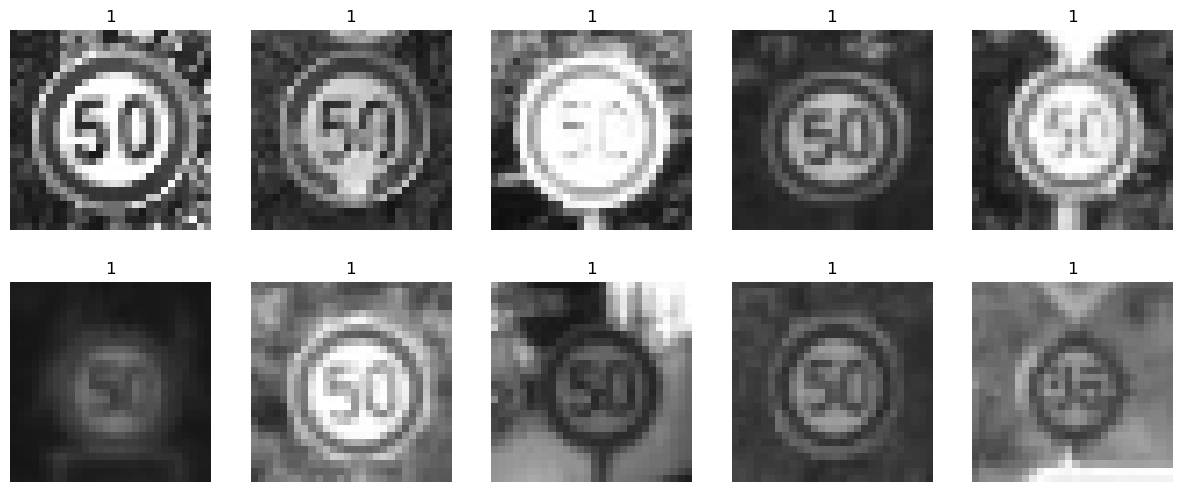

In [5]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [7]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [9]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [13]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.023921966552734375


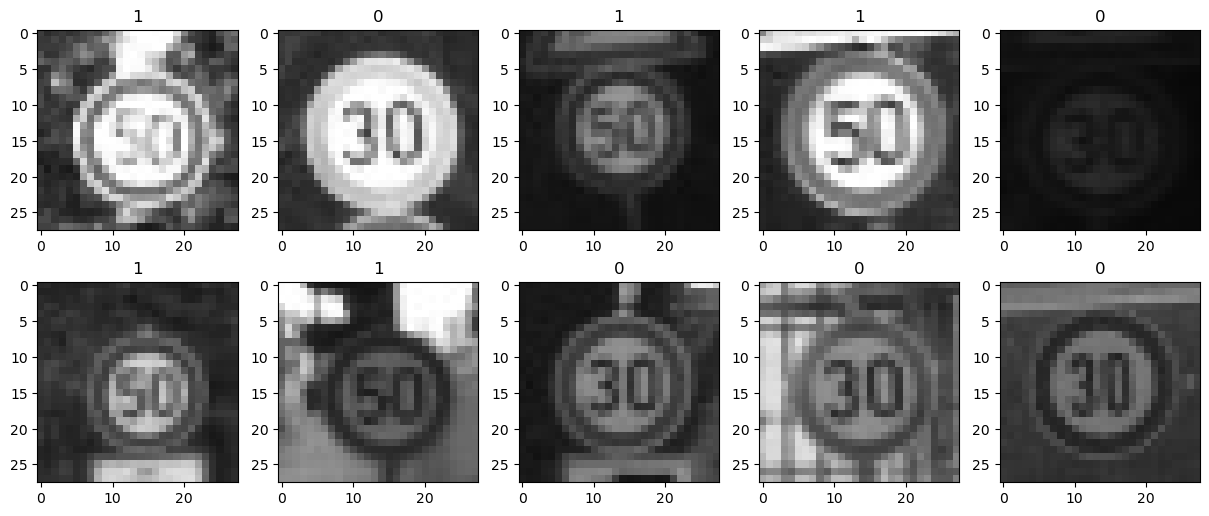

In [15]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [17]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [299]:
inputs = Input(shape=(pixels.shape[1],))
inputs_2 = Dense(8, activation="relu")(inputs)
inputs_2 = Dense(2, activation="relu")(inputs_2)
outputs = Dense(1, activation="linear")(inputs_2)
model = Model(inputs, outputs)

model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 8)                   │           6,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 2)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,301 (24.61 KB)

 Trainable params: 6,301 (24.61 KB)

 Non-trainable params: 0 (0.00 B)

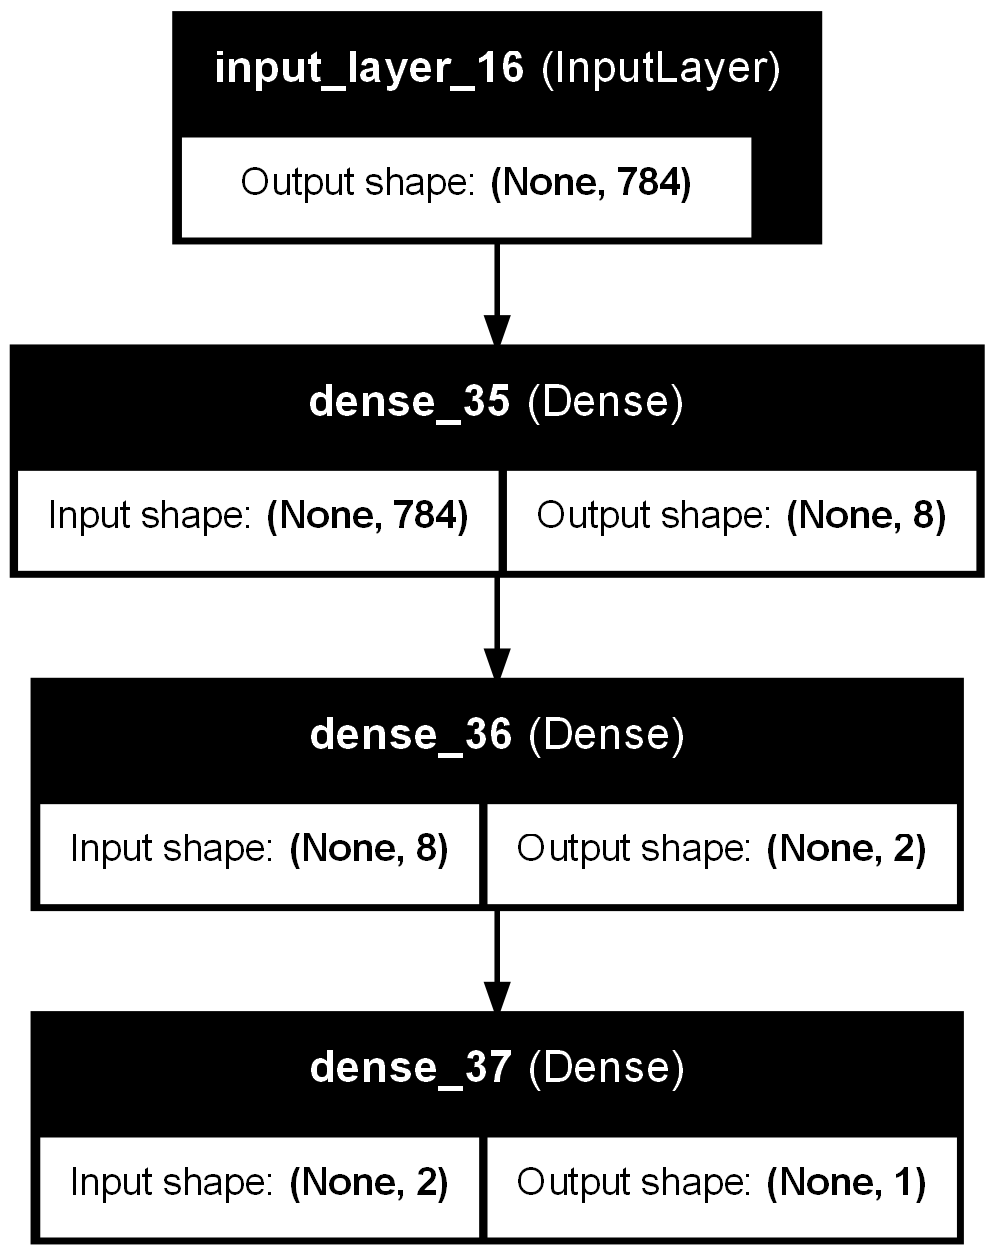

In [301]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)


In [303]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [305]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3197 
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1928
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1505
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1184
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1050
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0922
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0813
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0805
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0831
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0731


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

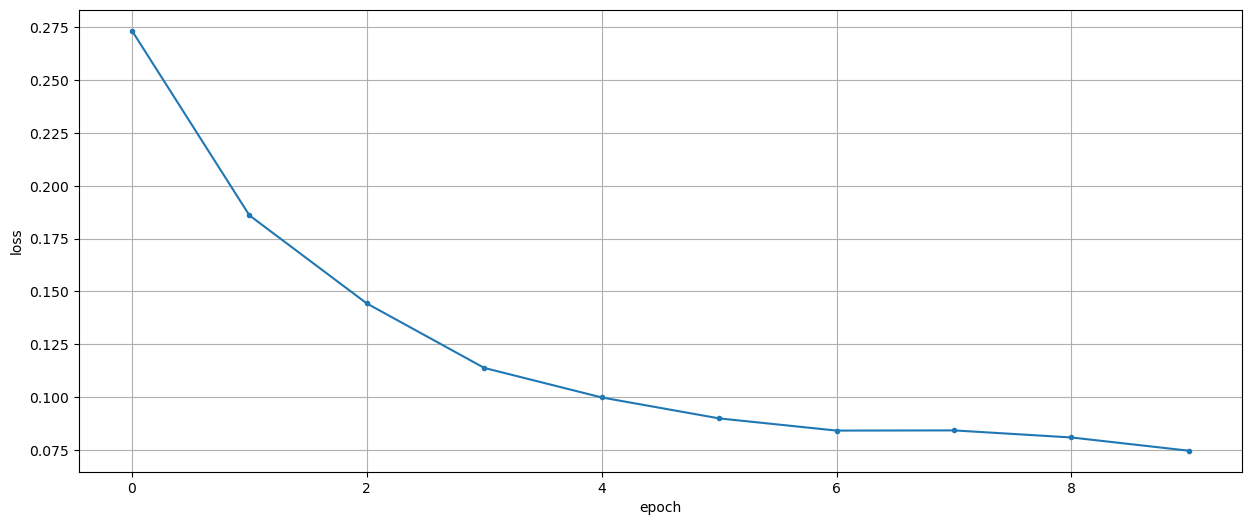

In [307]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[-0.00704059 -0.00657229  0.23584981  0.16858841 -0.15924247  0.13968594
  0.24855739  0.02040981] [-0.00704059 -0.00657229  0.23584981  0.16858841 -0.15924247  0.13968594
  0.24855739  0.02040981]


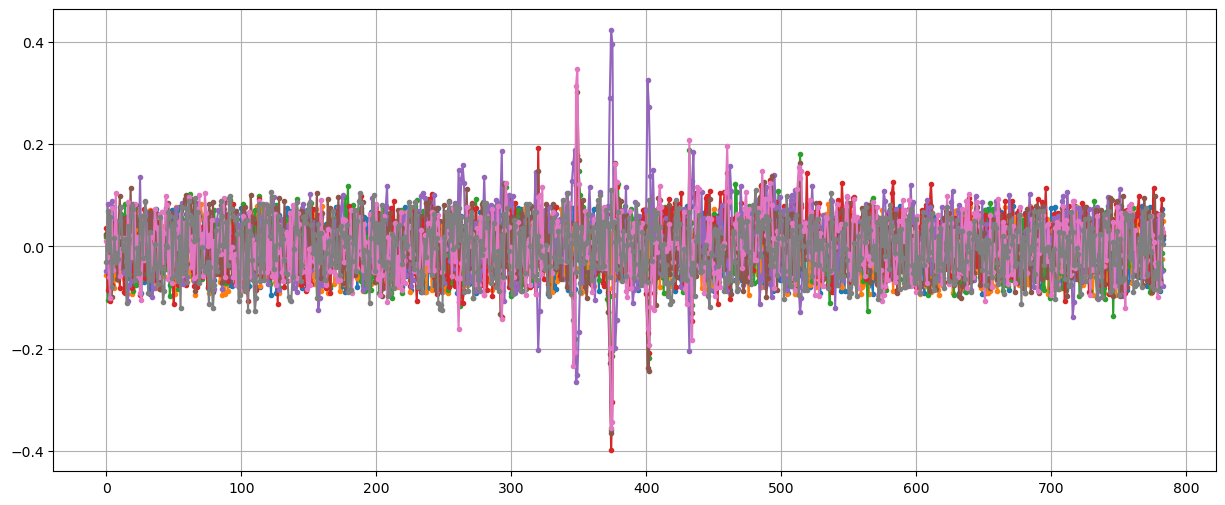

In [309]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [311]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.78669226]] 1


In [313]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


In [315]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9503355704697987


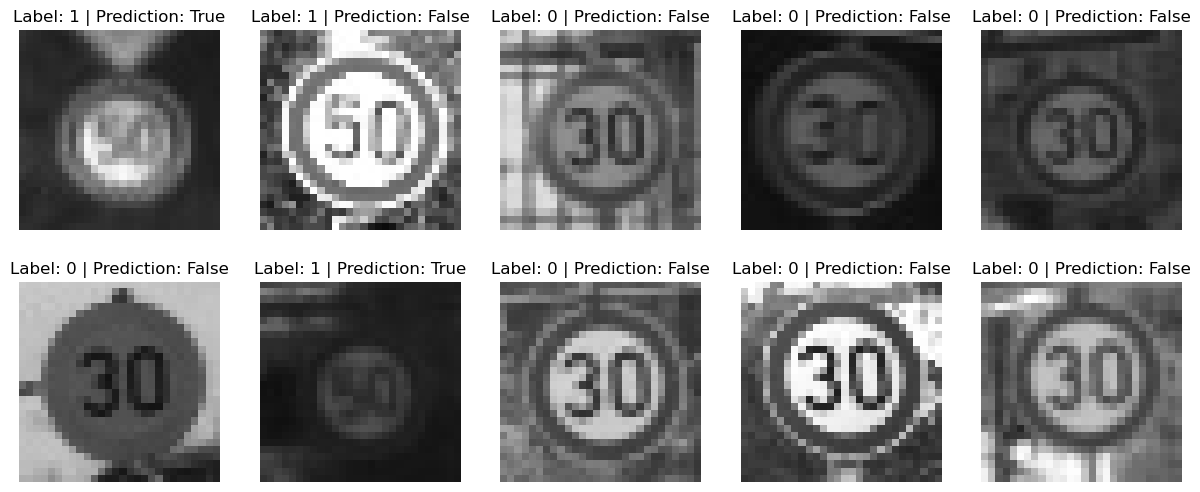

In [317]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

In [ ]:
# the maximum accuracy was 0.96